In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pantarei as rei
import copy
import src.system as sys
import src.Montecarlo as mc
from src.SAW_module import setup, mc_move, simulation, plot_val_over_NMC, unfold, visualize_chain, overlap, prob_overlap

# scheduler = rei.scheduler.ThreadScheduler(backend='process')
# job = rei.Thread(simulation, scheduler=scheduler, clear_output=True)

scheduler = rei.scheduler.ThreadScheduler(backend='process')
task = rei.Task(simulation, clear_first=True)
job = rei.Thread(task, scheduler=scheduler)

Total number of configurations is: 49
Total number of configurations is: 196


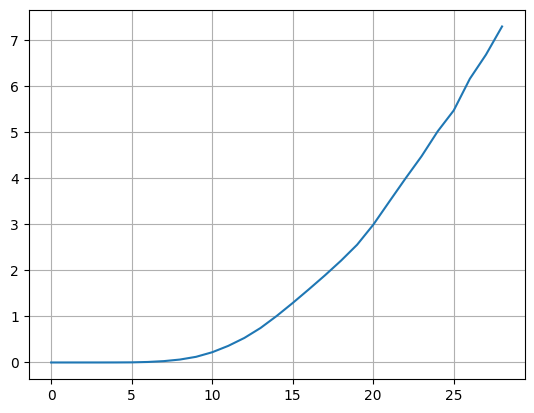

In [10]:
task = rei.Task(simulation) #,clear_first=True)
#job = rei.Thread(task, scheduler=scheduler)

N = 100
L = 1000
snapshots = 50
# snapshots = 10
# steps = 12*N
burnin = 3*N
steps = snapshots*burnin



data = task(N=N,L=L,steps=steps,burnin=burnin)
# scheduler.wait()
#data = simulation(N=N,L=L,steps=steps,burnin=burnin)
# visualize_chain(data['trajectory'][2])

my_sys = sys.System(N=N,L=L)
len_traj = len(data['trajectory'])
print(f"Total number of configurations is: {len(data['trajectory'])}")
for i in range(len_traj):
    my_sys.positions = copy.deepcopy(data['trajectory'][i])
    #        for deg in [90, 180, 270]:
    for _ in range(3):
        data['trajectory'].append(my_sys.rotate_pos(deg=90))
print(f"Total number of configurations is: {len(data['trajectory'])}")


bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
bins = [_ for _ in range(30)]
# bins = [0, 4, 8, 12, 16, 20]
drs = [bins[i]+0.5 for i in range(len(bins)-1)]
counts = []
prob = []
# task = rei.Task(prob_overlap)
job = rei.Thread(rei.Task(prob_overlap), scheduler=scheduler)
for dr in drs:
    result = job(dr=dr,data=data)
    # result = prob_overlap(dr=dr,data=data)
    # counts.append(result)
    prob.append(result)

scheduler.wait()
V2 = [-np.log(p) for p in prob]
plt.plot(bins[:-1],V2)
plt.grid()


# plt.stairs(prob,bins,fill=True)
# plt.savefig('prob_hist.png')


In [4]:
rei.report()

✅ ended   100% [30/30]
   ✅ simulation/a689ce576a5b7bc842a1876e90f5d4db 0:00:12 simulation(N=100,L=1000,steps=15000,burnin=300)
   ✅ prob_overlap/8cb04efcb31d7f21b3023c491761d80e 0:03:33 prob_overlap(clear_first=False,dr=0.5,data={'trajectory': [[[3, 5], [3, 6], [4, 6], [5, 6], [5,  ...
   ✅ prob_overlap/c9cb44b487c612b4cf33a6e2858fcce3 0:03:35 prob_overlap(clear_first=False,dr=1.5,data={'trajectory': [[[3, 5], [3, 6], [4, 6], [5, 6], [5,  ...
   ✅ prob_overlap/45b0474dabc033a3e2eea3312168729f 0:03:39 prob_overlap(clear_first=False,dr=2.5,data={'trajectory': [[[3, 5], [3, 6], [4, 6], [5, 6], [5,  ...
   ✅ prob_overlap/bfb24117dd0d48a6911b69a7cd7cbbaa 0:03:43 prob_overlap(clear_first=False,dr=3.5,data={'trajectory': [[[3, 5], [3, 6], [4, 6], [5, 6], [5,  ...
   ✅ prob_overlap/08f8df8a016dc3eefaf57036a90bf850 0:03:49 prob_overlap(clear_first=False,dr=4.5,data={'trajectory': [[[3, 5], [3, 6], [4, 6], [5, 6], [5,  ...
   ✅ prob_overlap/7148863e1625034893ead9244c66c1ee 0:03:59 prob_overlap(

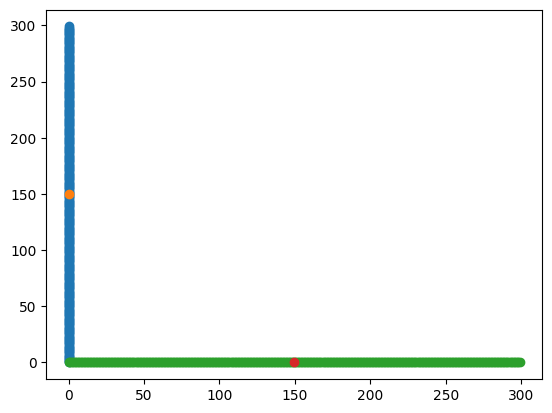

In [11]:
# Model parameters
N = 300
L = 1000
# L = 50

# positions, lattice = setup(N, L)
# plt.plot([r[0] for r in positions], [r[1] for r in positions], '-o')
# plt.show()
# print(np.array(positions).mean())
# np.shape(positions)[1]

my_sys = sys.System(N=N,L=L)
visualize_chain(my_sys.positions)
my_sys.rotate_pos()
visualize_chain(my_sys.positions)


In [32]:
# import matplotlib.animation as animation

# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# for x in range(5):
#     c = plt.Circle((x, 0), 0.3)
#     ax.add_artist(c)

# # def animate(n):
# #     """Update the system at step n"""
# #     # mc_move(positions,lattice)
# #     for p in ax.patches:
# #         # Set the particle positions here...
# #         p_n = np.array(p.get_center()) + (np.random.random(2) - 0.5)
# #         # p_n = np.array(positions)
# #         p.set_center(p_n)
# #     return ax.patches

# def animate(n):
#     """Update the system at step n"""
#     system = trajectory[n]
#     for i, p in ax.patches:
#         position = system[i]
#         p_n = np.array(position)
#         p.set_center(p_n)
#     return ax.patches

# N = 100
# L = 1000
# steps = int(5*N)
# positions, lattice = setup(N, L)
# trajectory = []

# for _ in range(steps):
#     mc_move(positions,lattice)
#     if _ % (steps/120) == 0:
#         trajectory.append(positions)


# ani = animation.FuncAnimation(fig, animate, 10, interval=50, blit=True)
# plt.show()
# # html = ani.to_html5_video()
# # %matplotlib ipympl

N=10, R=4.9
N=20, R=8.1
N=50, R=1.7e+01
N=100, R=2.5e+01
N=200, R=4.7e+01
N=500, R=9.2e+01


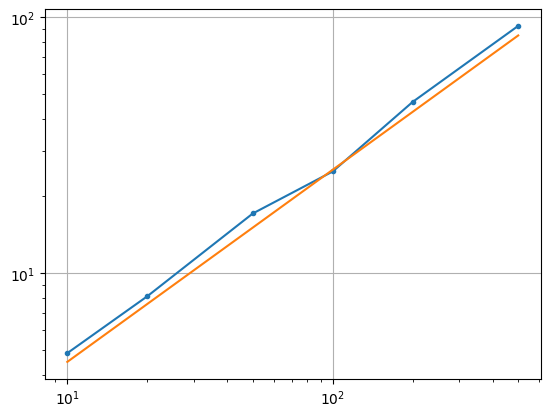

In [14]:
Ns = np.linspace(10,500,dtype=int)
Ns = [10,20,50,100,200,500]
Rs = []
save_pos = []

for N in Ns: 
    positions, lattice, R_values = simulation(N,1000,10*N,4*N)
    save_pos.append(positions)
    Rs.append(np.mean(R_values))
    print(f'N={N}, R={Rs[-1]:.2}')


plt.loglog(Ns,Rs,'.-')
plt.loglog(Ns,[.8*_**(3/4) for _ in Ns],'-')
plt.grid()